# Logistic Regression Overview

Logistic Regression is a statistical model used for binary classification tasks. Despite the term "regression," logistic regression is used to predict the probability of a binary outcome, meaning it outputs a probability score between 0 and 1. The model is based on the logistic (sigmoid) function, which maps any real-valued number into the range [0, 1]. It is widely used in fields like machine learning, medical diagnosis, and economics for predicting binary outcomes.

## Mathematical Formulation

The model computes a weighted sum of the input features, often denoted as

$$
z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

and then applies the sigmoid function to this linear combination:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $z$ is the weighted sum of the inputs and bias term,
- $\sigma(z)$ is the sigmoid function, which gives a value between 0 and 1.

The model predicts the probability that the input $X$ belongs to the positive class (1). A threshold (commonly 0.5) is applied to determine the final class label.

---

# Advantages of Logistic Regression

- Simple and easy to interpret.
- Computationally efficient.
- Outputs probabilities, useful for ranking and confidence.
- Regularization helps prevent overfitting.
- Performs well on linearly separable data.

# Disadvantages of Logistic Regression

- Limited to linear decision boundaries.
- Sensitive to feature scaling.
- Struggles with large, complex datasets.
- Prone to overfitting in high dimensions.
- Issues with multicollinearity.

---
## Dataset Description

The dataset used in this module is the **Breast Cancer Wisconsin (Diagnostic) Dataset**, available through `sklearn.datasets.load_breast_cancer`. It consists of **569** samples, each representing a breast tumor that has been classified as either **benign** or **malignant** based on features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

Each sample is described by **30 real-valued features** that capture various characteristics of the cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, and symmetry.

For the logistic regression model:
- **Features**: All 30 features from the dataset are used, which include measurements such as mean radius, mean texture, and mean area.
- **Target Labels**: The target variable represents the tumor classification:
  - **0** for benign tumors
  - **1** for malignant tumors

Before training, the dataset was:
- **Shuffled** to ensure randomness in the splitting process.
- **Split manually** into 80% training and 20% testing sets.
- **Standardized** using z-score normalization to scale the features so that each contributes equally to the model's performance.

This preparation allows the logistic regression model to be trained and evaluated on the data effectively.


In [34]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

In [27]:
# Define Neuron Class
class SingleNeuron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []
        self.accuracies = []

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        # Compute the linear function z = Xw + b, and apply sigmoid
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def cost(self, y, y_hat):
        # Compute the binary cross-entropy loss
        m = len(y)
        return -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def gradient_descent(self, X, y):
        m = len(y)
        y_hat = self.predict(X)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Update parameters
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        for epoch in range(self.epochs):
            self.gradient_descent(X, y)
            y_hat = self.predict(X)
            loss = self.cost(y, y_hat)
            accuracy = np.mean((y_hat >= 0.5).astype(int) == y)

            # Store loss and accuracy for visualization
            self.losses.append(loss)
            self.accuracies.append(accuracy)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

    def plot_loss_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.epochs), self.losses, color='blue')
        plt.title("Loss Curve", fontsize=16)
        plt.xlabel("Epochs", fontsize=14)
        plt.ylabel("Loss", fontsize=14)
        plt.grid(True)
        plt.show()

    def plot_accuracy_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.epochs), self.accuracies, color='green')
        plt.title("Accuracy Curve", fontsize=16)
        plt.xlabel("Epochs", fontsize=14)
        plt.ylabel("Accuracy", fontsize=14)
        plt.grid(True)
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.title("Confusion Matrix", fontsize=16)
        plt.xlabel("Predicted", fontsize=14)
        plt.ylabel("True", fontsize=14)
        plt.show()



In [28]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [29]:
# Manually split the data into 80-20 (train-test) split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize the dataset (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SingleNeuron model
neuron = SingleNeuron(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
neuron.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_prob = neuron.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

Epoch 0/1000, Loss: 0.6723342343803158, Accuracy: 92.97%
Epoch 100/1000, Loss: 0.2365801694155535, Accuracy: 95.60%
Epoch 200/1000, Loss: 0.1770131107661706, Accuracy: 96.48%
Epoch 300/1000, Loss: 0.15037078446530613, Accuracy: 96.70%
Epoch 400/1000, Loss: 0.13467919971176, Accuracy: 96.92%
Epoch 500/1000, Loss: 0.12411517218651692, Accuracy: 97.80%
Epoch 600/1000, Loss: 0.11640743676947149, Accuracy: 97.80%
Epoch 700/1000, Loss: 0.11047481952415841, Accuracy: 98.24%
Epoch 800/1000, Loss: 0.1057320972371524, Accuracy: 98.24%
Epoch 900/1000, Loss: 0.10183226832694603, Accuracy: 98.24%
Accuracy on Test Set: 98.25%


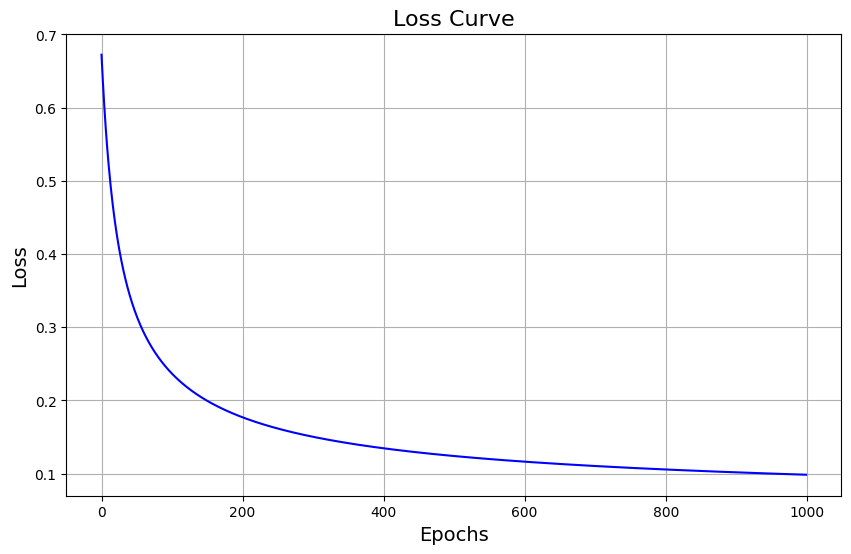

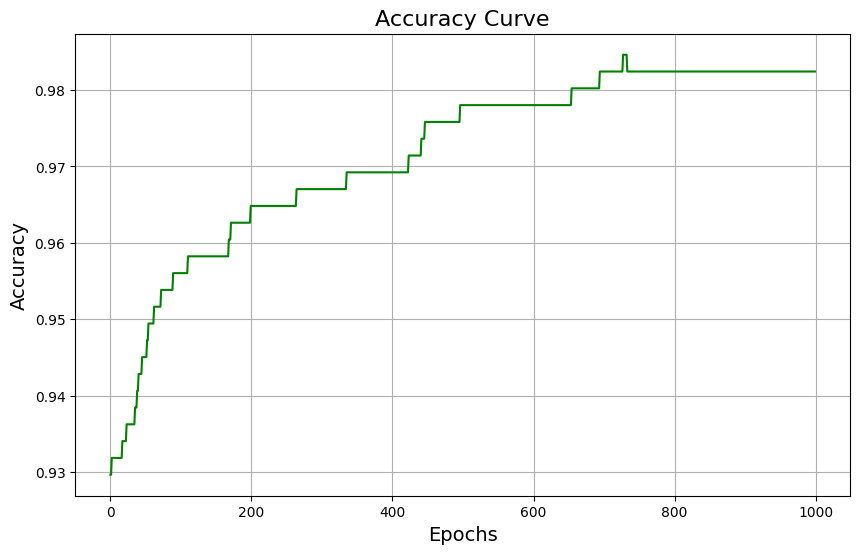

In [30]:
# Visualizations
neuron.plot_loss_curve()
neuron.plot_accuracy_curve()

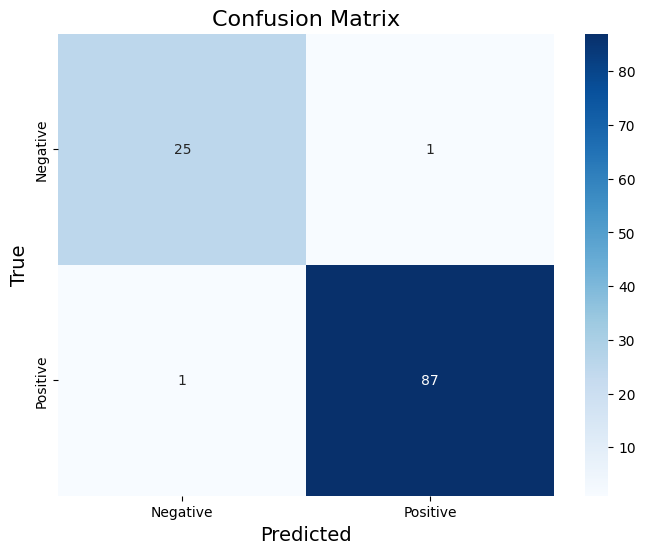

In [31]:
# Confusion Matrix
neuron.plot_confusion_matrix(y_test, y_pred)

# Results and Discussion

## **Loss Curve**:
- The Loss Curve shows a typical exponential decay pattern, where the loss decreases rapidly in the initial epochs and stabilizes towards the end of training.This behavior indicates that the model is learning effectively and converging to a solution.
- The fact that the loss reaches a steady value suggests that the model has successfully minimized the error on the training set and is not overfitting.
## **Accuracy Curve**:
   - The accuracy increases steadily, reaching around 98% by the end of training, showing that the logistic regression model performs well in classifying the breast cancer dataset.

## **Confusion Matrix**:
   - **True Negatives**: 25 benign tumors correctly classified.
   - **False Positives**: 1 benign tumor misclassified as malignant.
   - **False Negatives**: 1 malignant tumor misclassified as benign.
   - **True Positives**: 87 malignant tumors correctly classified.
   - The confusion matrix shows low misclassification, contributing to the high accuracy of the model.

## Key Insights:
- **Convergence**: The loss curve stabilizes, indicating efficient learning.
- **Performance**: With 98% accuracy and minimal misclassifications, the model shows excellent classification performance.
- **Model Behavior**: The logistic regression model works well on this linearly separable dataset, achieving strong results.
